In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import starry
starry.config.lazy=False
from scipy.linalg import cho_factor, cho_solve

In [3]:
map=starry.Map(10)
map.inc=65

Pre-computing some matrices... Done.


In [4]:
map.load("earth")

Compiling `render`... Done.


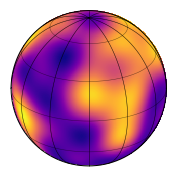

In [5]:
map.show()

Compiling `flux`... Done.
/Users/notasthma/.local/lib/python3.7/site-packages/Theano-1.0.4-py3.7.egg/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


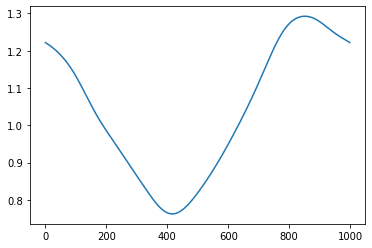

In [6]:
plt.plot(map.flux(theta=np.linspace(0, 360, 1000)))

In [7]:
A = map.design_matrix(theta=np.linspace(0, 360, 1000))

Compiling `X`... Done.


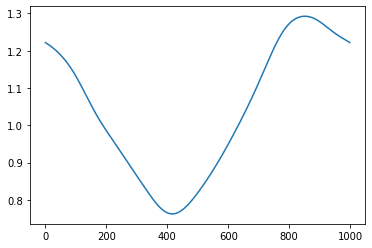

In [8]:
#A.dot(map.y)=flux


plt.plot(A.dot(map.y))


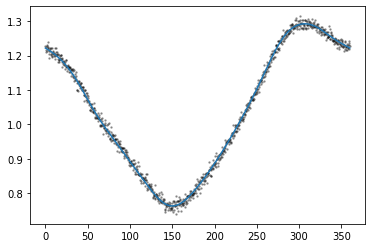

In [9]:
#adding noise to the LC

theta = np.linspace(0, 360, 1000)
flux0 = map.flux(theta=theta)
sigma = 0.01
flux = flux0 + sigma * np.random.randn(1000)

plt.plot(theta, flux, "k.", alpha=0.3, ms=3)
plt.plot(theta, flux0)

In [10]:
AT=A.T

In [11]:
lam = np.std(map.y[1:]) ** 2
lam_inv=1/lam
Lam_inv=lam_inv*np.diag(np.ones(121))
Lam_inv.shape

(121, 121)

In [12]:
var=sigma*sigma
inv_var=1/var
AT_inv_var=inv_var*AT
AT_inv_var_A=AT_inv_var.dot(A)

In [13]:
inv_sigmaY=AT_inv_var_A+Lam_inv
ATsf=AT_inv_var.dot(flux.reshape(-1,1))


In [14]:
L=cho_factor(inv_sigmaY)
y_hat=cho_solve(L,ATsf)

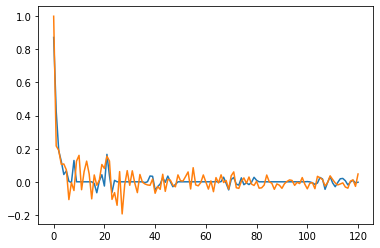

In [15]:
plt.plot(y_hat)
plt.plot(map.y)

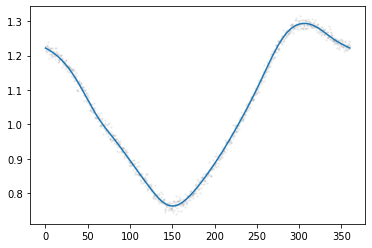

In [16]:
f_hat=A.dot(y_hat)
plt.plot(theta, flux, "k.", alpha=0.05, ms=3)
plt.plot(theta,f_hat)

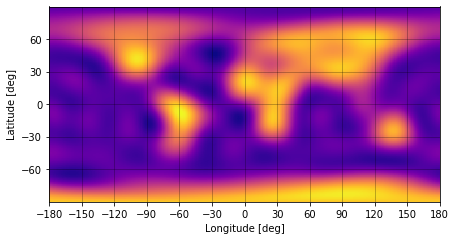

In [17]:
map.show(projection="rect")

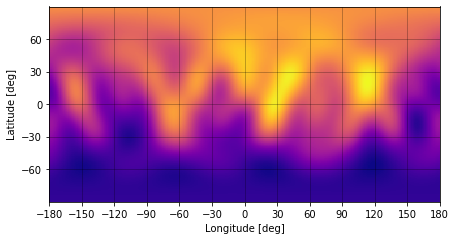

In [18]:
map[1:,:]=y_hat.flatten()[1:]
map.show(projection="rect")

In [21]:
sigma

0.01

In [22]:
map.set_data(flux, C=sigma**2)

In [24]:
map.set_prior(L=lam)

In [28]:
yhat, L = map.solve(design_matrix=A)

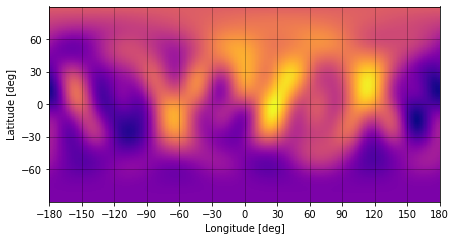

In [30]:
map[1:,:]=yhat.flatten()
map.show(projection="rect")

In [31]:
yhat.shape

(120,)

In [32]:
map.lnlike?